<a href="https://colab.research.google.com/github/I-gW-23-27/Skript/blob/main/beispiele/Histogramm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogramme zeichnen mit Pytamaro

Ein Histogramm ist eine grafische Darstellung der Häufigkeitsverteilung
kardinal skalierter Merkmale. Es erfordert die Einteilung der Daten in
Klassen (englisch bins), die eine konstante oder variable Breite haben
können. Es werden direkt nebeneinanderliegende Rechtecke von der Breite
der jeweiligen Klasse gezeichnet, deren Flächeninhalte die (relativen
oder absoluten) Klassenhäufigkeiten darstellen. Die Höhe jedes Rechtecks
stellt dann die (relative oder absolute) Häufigkeitsdichte dar, also die
(relative oder absolute) Häufigkeit dividiert durch die Breite der
entsprechenden Klasse.

[Text von Wikipedia](https://de.wikipedia.org/wiki/Histogramm)

![Histogramm Beispiel](https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Thist_german.png/440px-Thist_german.png)

In dieser Übung zeichnen Sie ein Histogramm mit der Verteilung der
Körpergrössen der Schülerinnen und Schüler in Ihrer Klasse.

Hier folgt die Zelle zum Laden von PyTamaro in google colaboratory:

In [ ]:
! pip install pytamaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 18.7 MB/s eta 0:00:00


## Listen

Damit die
Körpergrössen in Python sinnvoll verarbeitet werden können, brauchen wir
die Datenstruktur *Liste*.

In Python werden Listen dazu verwendet, mehrere Werte geordnet einer Variablen zuzuweisen.
Listen sind allerdings nur eine von vier in Python standardmässig zur
Verfügung stehenden Datenstrukturen, die das können.

### Listen erstellen

Am einfachsten werden Listen durch Literale erstell. Dazu werden die Werte der Liste durch Kommas getrennt in eckigen Klammern geschrieben:

In [ ]:
numbers = [1, 8, 3]
print(numbers)
vegetables = ['Spinat', 'Sellerie', 'Blumenkohl']
print(vegetables)

[1, 8, 3]
['Spinat', 'Sellerie', 'Blumenkohl']


### Auf Elemente einer Liste zugreifen

Die Elemente einer Liste sind geordnet und indexiert. Geordnet heisst,
dass die Liste die Reihenfolge der Elemente so behält, wie sie erstellt
wird - zumindest solange die Liste nicht verändert wird. Indexiert
heisst, dass jedes Element einer Liste eine Nummer erhält. Allerdings
beginnt man mit Null zu zählen. Das bedeutet, dass der `Sellerie` in der Liste `vegetables`den Index `1` hat.

Um das zweite Element der Liste auszugeben, muss Python nach dem Element
mit dem Index `1` der entsprechenden Liste gefragt werden:

In [ ]:
print(vegetables[1])

Sellerie


Listen können auch mit einer sogenannten *list comprehenison* erstellt werden.

In [ ]:
numbers = [i for i in range(1,21)]
print(numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Eine *list comprehension* funktioniert ähnlich, wie die Beschreibung einer Menge in
der Mathematik ($\{x \in \mathbb{N} \mid 1 \leq x < 21\}$).
```Python
for i in range(1,21)
```
ist bereits bei der Konstruktion der Bahnhofsuhr vorgekommen. `1` ist
der Startwert für den Zähler `i` und 21 die obere Grenze.

Listen sind nützliche Datenstrukturen, weil sie durchlaufen werden
können und dabei jedes einzelne Element als Parameter einer Funktion
übergeben werden kann.

Als Beispiel wird die Quadratzahl jedes Elements in `numbers` berechnet
und ausgegeben.

In [ ]:
for number in numbers:
    print(number ** 2)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


Es hat sich eingebürgert, für Listen Namen von Variablen im Plural zu
wählen. Dann können die einzelnen Elemente im Singular bezeichnet
werden. Dies ist jedoch reine Konvention und technisch nicht
erforderlich. Um das zu zeigen findet sich unten ein Beispiel, das sich
*nicht* an diese Konvention hält. Dazu wird die Liste `numbers` zuerst der Variablen $y$ zugewiesen.

In [ ]:
y = numbers
for x in y:
    print(x ** 2)

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400


Listen können auch leer sein. Eine leere Liste wird folgendermassen erstellt:

In [ ]:
leere_liste = []

Wenn einer bestehenden Liste ein Element angefügt werden soll, stellt
Python die Funktion `listenname.append(Element)` zur Verfügung.

In [ ]:
ein_paar_elemente = [2, 5, 1]
print(ein_paar_elemente)
ein_paar_elemente.append(7)
print(ein_paar_elemente)

[2, 5, 1]
[2, 5, 1, 7]


### Anwendung

Als nächstes nehmen Sie die gemessenen Grössen in der Klasse in eine
Liste `measurements` auf.

In [ ]:
measurements = []

In [ ]:
import random

In [ ]:
# Anstelle der echten Körpergrössen hier eine Zufällige Liste
# möglicher Grössen
measurements = [random.randint(150,180) for i in range(26)]
print(measurements)

[151, 159, 164, 174, 160, 160, 168, 155, 154, 168, 173, 163, 174, 161, 170, 162, 168, 167, 179, 159, 164, 169, 154, 171, 180, 174]


Damit aus der Liste der Körpergrössen ein Histogramm gezeichnet werden
kann, müssen die Körpergrössen in Gruppen (engl. bin) eingeteilt werden
und die Elemente einer Gruppe gezählt werden.

Für diese Übung sollen die Körpergrössen in Gruppen mit 5cm Abstand eingeteilt werden. Das
heisst, eine Gruppe sind zum Beispiel alle Werte von 160cm bis 164cm.

Als Vorbereitung sehen Sie in der folgenden Zelle eine Schleife, die einmal über alle
Grössen läuft und zählt, wie viele Werte zwischen 160cm bis 164cm liegen.

In [ ]:
bin_160_bis_164 = 0
for measure in measurements:
    if measure >= 160 and measure < 165:
        bin_160_bis_164 += 1

print(bin_160_bis_164)

7


Dieses Code Snippet führt eine Bedingung ein.
Bedingungen oder
sogenannte `if`-Statements stellen sicher, dass bestimmter Code nur
ausgeführt wird, wenn die Bedingung, die geprüft wird, eingehalten wird. Im
Beispiel werden zwei Bedingungen geprüft, die kumulativ erfüllt sein
müssen (erste Bedinung `measure >= 160`, zweite Bedingung
`measure < 165`). Das heisst, wenn beide Bedingungen erfüllt sind, wird
`bin_160_bis_164 += 1` ausgeführt. Dies ist eine Kurzschreibweise für
`bin_160_bis_164 = bin_160_bis_164 + 1`.

Damit dies für die ganze Liste verallgemeinert werden kann, muss der kleinste und der grösste Wert der Liste bekannt sein.

Das Minimum einer Liste kann folgendermassen ermittelt werden:

In [ ]:
def get_minimum(input : list[int]) -> int:
    minimum = input[0]

    for value in input:
        if value < minimum:
            minimum = value

    return minimum

print(get_minimum(measurements))

151


Schreiben Sie eine vergleichbare Funktion, die das Maximum einer Liste ausgibt.

In [ ]:
def get_maximum(input : list[int]) -> int:
    # TODO: Funktion zur Suche des Maximums in einer Liste
    # pass
    maximum = input[0]

    for value in input:
        if value > maximum:
            maximum = value

    return maximum

print(get_maximum(measurements))

180


Um die Möglichkeiten, welche `if`-Statements bieten noch etwas weiter zu
illustrieren, finden Sie in der nächsten Zelle eine Schleife, welche
gerade Zahlen quadriert und ungerade mit drei potenziert. Falls statt
einer Zahl ein anderer Datentyp auftaucht, wird der String `unzulässiger
Input` in die Liste der Resultate eingetragen.

In [ ]:
demo_list = [1, 2, 3, 4, 5, 'hallo', 7, 8, 9]

def if_demo(numbers : list[int]) -> list[int]:
    results = []
    for number in numbers:
        if type(number) != int:
            results.append('unzulässiger Input')
        elif number % 2 == 0:
            results.append(number ** 2)
        else:
            results.append(number ** 3)
    return results

print(if_demo(demo_list))

[1, 4, 27, 16, 125, 'unzulässiger Input', 343, 64, 729]


In diesem Beispiel bedeutet `!=` **nicht**. Es wird
geprüft, ob number vom Typ `int` ist, wenn dies nicht der Fall ist, wird
in der Resultatliste `unzulässiger Input` eingetragen. Mit `elif` wird
eine zweite Bedingung geprüft. Im Beispiel ob die Zahl ohne Rest durch 2
teilbar ist (`number % 2 == 0`). Damit Python zwischen einem Vergleich
und einer Zuweisung unterscheiden kann, wird bei Vergleichen ein
doppeltes Gleichheitszeichen verwendet. Falls keine der beiden geprüften
Bedingungen erfüllt ist, wird mit `else` angezeigt, was mit dem Rest der
Fälle zu geschehen habe.

Aus den obigen Beispielen geht implizit hervor, dass sowohl `elif` wie
auch `else` optional sind. `elif` Bedingungen können beliebig viele
eingefügt werden, `else` kann nur einmal vorkommen.

Python stellt eine Funktion `min()` und `max()` zur Verfügung, welche das Miniumum bzw. das Maximum einer Liste ausgeben. Trotzdem war das eine gute Fingerübung, um sich mit der
Funktion von Bedingungen vertraut zu machen.

Nun sollten Sie in der Lage sein, den Beispiel Code für die Grössen
zwischen 160cm und 164cm zu verallgemeinern, so dass die
ganze Liste der Körpergrössen in 5cm Bins "abgefüllt" wird.

Hinweis: Die einzelnen Bins sind ihrerseits Elemente einer Liste.

In [ ]:
def measure_to_bin(measurements : list[int]) -> list[float]:
    bins = []
    total = len(measurements)

    counter = 0

    for i in range(min(measurements), max(measurements) + 5, 5):
        for measure in measurements:
            if measure >= i and measure < i + 5:
                counter += 1

        bins.append(counter)
        counter = 0

    return [x * 100 / total for x in bins]

bins = measure_to_bin(measurements)
print(bins)

[15.384615384615385, 15.384615384615385, 19.23076923076923, 23.076923076923077, 19.23076923076923, 7.6923076923076925, 0.0]


Die so gruppierten Werte können nun visualisiert werden. Dazu braucht es
eine Funktion, welche eine Liste als Parameter entgegennimmt und eine
Liste mit Grafiken (Rechtecken mit der entsprechenden Länge) zurückgibt.

In [ ]:
from pytamaro.de import (rechteck, Grafik,
                         blau,
                         fixiere, kombiniere,
                         unten_links, unten_rechts,
                         zeige_grafik)

In [ ]:
def create_pillars(heights : list[float]) -> list[Grafik]:
    width = 5
    pillars = []

    for height in heights:
        pillars.append(rechteck(width, height, blau))

    return pillars

pillars = create_pillars(bins)
zeige_grafik(pillars[0])

Abschliessend müssen die Säulen noch nebeneinander angeordnet werden.
Dazu werden die Funktionen `fixiere()` und `kombiniere()` verwendet.

In [ ]:
def draw_histogram(pillars : list[Grafik]) -> Grafik:
    histogram = pillars[0]

    for i in range(1, len(pillars)):
        histogram = fixiere(unten_rechts, histogram)
        pillar = fixiere(unten_links, pillars[i])
        histogram = kombiniere(histogram, pillar)

    return histogram

zeige_grafik(draw_histogram(pillars))

Damit das Erstellen eines Histogramms für den Nutzer etwas komfortabler
möglich ist, sollen nun die einzelnen Funktionen so kombiniert werden,
dass einer Funktion eine Liste mit Werten übergeben werden kann und
diese dann ein Histogramm zurückgibt.

In [ ]:
def get_histogram(values : list[float]) -> Grafik:
    # TODO: schreiben Sie eine kombinierte Funktion
    pass

In [ ]:
distribution = []

counter = 0

for i in range(150, 185, 5):
    for measure in measurements:
        if measure >= i and measure < i + 5:
            counter += 1

    distribution.append(counter)
    counter = 0

distribution


[3, 3, 7, 5, 6, 1, 1]

## Visualisierung

In [ ]:
from pytamaro.de import (rechteck, Grafik,
                         blau,
                         fixiere, kombiniere,
                         unten_links, unten_rechts,
                         zeige_grafik)

In [ ]:
def block(number : int) -> Grafik:
    width = 10
    height = width * number
    return rechteck(width, height, blau)

zeige_grafik(block(3))

In [ ]:
blocks = []

for value in distribution:
    blocks.append(block(value))

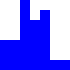

In [ ]:
histogram = blocks[0]

for i in range(1, len(blocks)):
    histogram = fixiere(unten_rechts, histogram)
    addition = fixiere(unten_links, blocks[i])
    histogram = kombiniere(histogram, addition)

zeige_grafik(histogram)

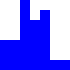

In [ ]:
def draw_histogram(measurements : list[int]) -> Grafik:
    bins = []

    counter = 0

    for i in range(min(measurements), max(measurements) + 5, 5):
        for measure in measurements:
            if measure >= i and measure < i + 5:
                counter += 1

        bins.append(counter)
        counter = 0

    blocks = []

    for value in distribution:
        blocks.append(block(value))

    histogram = blocks[0]

    for i in range(1, len(blocks)):
        histogram = fixiere(unten_rechts, histogram)
        addition = fixiere(unten_links, blocks[i])
        histogram = kombiniere(histogram, addition)

    return histogram

zeige_grafik(draw_histogram(measurements))



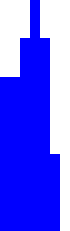

In [ ]:
def distribution(measurements : list[int]) -> list[float]:
    bins = []
    total = len(measurements)

    counter = 0

    for i in range(min(measurements), max(measurements) + 5, 5):
        for measure in measurements:
            if measure >= i and measure < i + 5:
                counter += 1

        bins.append(counter)
        counter = 0

    return [x * 100 / total for x in bins]

def draw_histogram2(measurements : list[int]) -> Grafik:
    bins = distribution(measurements)

    blocks = []

    for value in bins:
        blocks.append(block(value))

    histogram = blocks[0]

    for i in range(1, len(blocks)):
        histogram = fixiere(unten_rechts, histogram)
        addition = fixiere(unten_links, blocks[i])
        histogram = kombiniere(histogram, addition)

    return histogram

zeige_grafik(draw_histogram2(measurements))